<a href="https://colab.research.google.com/github/guptankit005/Analytics/blob/master/Decision_Tree_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [21]:
#importing data from sklearn
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()

#converting data into pandas dataframe
canc_data = pd.DataFrame(data.data, columns=data.feature_names)

#adding target field to the dataset
canc_data['target'] = pd.Series(data.target)

In [22]:
print(data.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [23]:
#printing first five rows of data
#canc_data.head()

#checking information about all the columns
#canc_data.info()

#checking basic statistical distribution of data
#canc_data.describe().transpose()

#checking for null values
#canc_data.isnull().sum()

#checking for duplicate rows
#canc_data.duplicated().sum()

#212 - Malignant, 357 - Benign
canc_data['target'].value_counts()
#value count to see if data is balanced or imbalanced.

1    357
0    212
Name: target, dtype: int64

In [24]:
#creating X and y
X_feature = list(canc_data.columns)
X_feature.remove('target')

X = canc_data[X_feature]
y = canc_data['target']

In [25]:
#splitting data for training and testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 100)

# Decision Tree Using Gini Index

Output when criterion is : gini
----------------------------------
              precision    recall  f1-score   support

           0       0.97      0.90      0.93        69
           1       0.93      0.98      0.96       102

    accuracy                           0.95       171
   macro avg       0.95      0.94      0.94       171
weighted avg       0.95      0.95      0.95       171

Accuracy score on test:  0.947
Accuracy score on train:  0.977
log_loss :  1.8178630686327932
AUC Score :  0.949


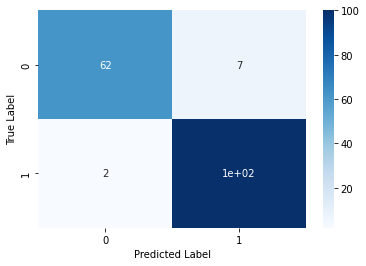



Output when criterion is : entropy
----------------------------------
              precision    recall  f1-score   support

           0       0.94      0.84      0.89        69
           1       0.90      0.96      0.93       102

    accuracy                           0.91       171
   macro avg       0.92      0.90      0.91       171
weighted avg       0.91      0.91      0.91       171

Accuracy score on test:  0.912
Accuracy score on train:  0.96
log_loss :  3.0297686637157457
AUC Score :  0.942


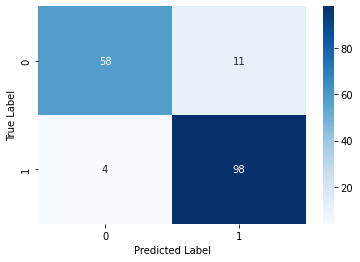

In [37]:
for i in ['gini','entropy']:
  
  print("Output when criterion is :", i)
  print('----------------------------------')
  from sklearn.tree import DecisionTreeClassifier

  i = DecisionTreeClassifier(criterion = i ,random_state=0, max_depth = 3).fit(X_train, y_train)
  #predicting for our test data
  y_pred = i.predict(X_test)
  #generating classification report 
  from sklearn.metrics import classification_report
  print(classification_report(y_test, y_pred))

  #importing libraries to check model performance
  from sklearn.metrics import confusion_matrix
  from sklearn.metrics import accuracy_score
  from sklearn.metrics import log_loss
  from sklearn import metrics

  print("Accuracy score on test: " , round((i.score(X_test, y_test)),3))
  print("Accuracy score on train: ", round((i.score(X_train, y_train)),3))

  #printing log loss for the model
  print('log_loss : ', log_loss(y_test, y_pred))



  #let find ROC and AUC score
  #before we calculate roc_auc_score(), we need to find out the predicted probabilityiies for test data.

  pred_prob = pd.DataFrame(i.predict_proba(X_test))

  #we'll also add the actual label

  test_result = pd.DataFrame( { 'actual' : y_test})
  test_result = test_result.reset_index()

  test_result['prob_0'] = pred_prob.iloc[:,0:1]
  test_result['prob_1'] = pred_prob.iloc[:,1:2]

  #to calculate ROC AUC score we will pass actual class labels and predicted probability 

  auc_score = round(metrics.roc_auc_score(test_result.actual, test_result.prob_1),3)
  print("AUC Score : ",auc_score)


  #generating confusion matrix
  cf_matrix = confusion_matrix(y_test, y_pred)
  sns.heatmap(cf_matrix, annot=True, cmap='Blues')
  plt.ylabel("True Label")
  plt.xlabel("Predicted Label")
  plt.show()

  print("\n")

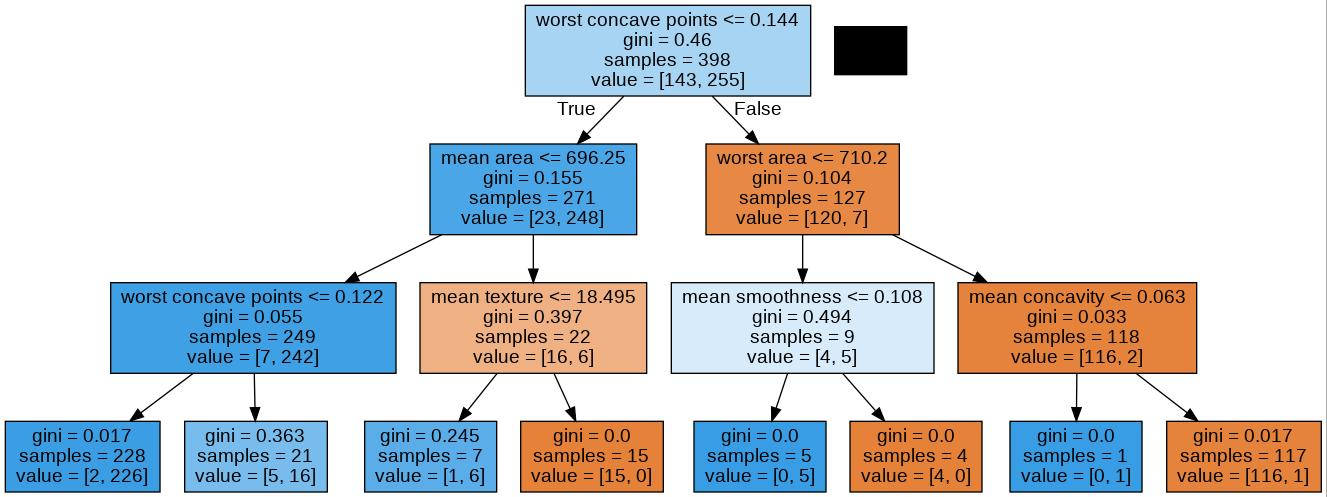

In [35]:
#decision tree visualization. We will use graphviz software for our purpose.
from sklearn import tree
from sklearn.tree import export_graphviz
import pydotplus as pdot
from IPython.display import Image
   
#exporting the tree model into odt file
gini = DecisionTreeClassifier(criterion = 'gini' ,random_state=0, max_depth = 3).fit(X_train, y_train)
export_graphviz(gini, out_file='clf_tree_gini.odt', feature_names = X_train.columns,filled = True)
graph = pdot.graphviz.graph_from_dot_file('clf_tree_gini.odt')
graph.write_jpg('clf_tree_gini.png')
Image(filename='clf_tree_gini.png')


In [43]:
#we can also calculate gini index for validation
#In the top node, probability of finding (212 - Malignant, 357 - Benign) benign cancer is 255/398 and malignant is 143/398.
gini_imp_node1 = 1 - (pow(255/398,2) + pow(143/398,2))
print(round(gini_imp_node1,2))

0.46


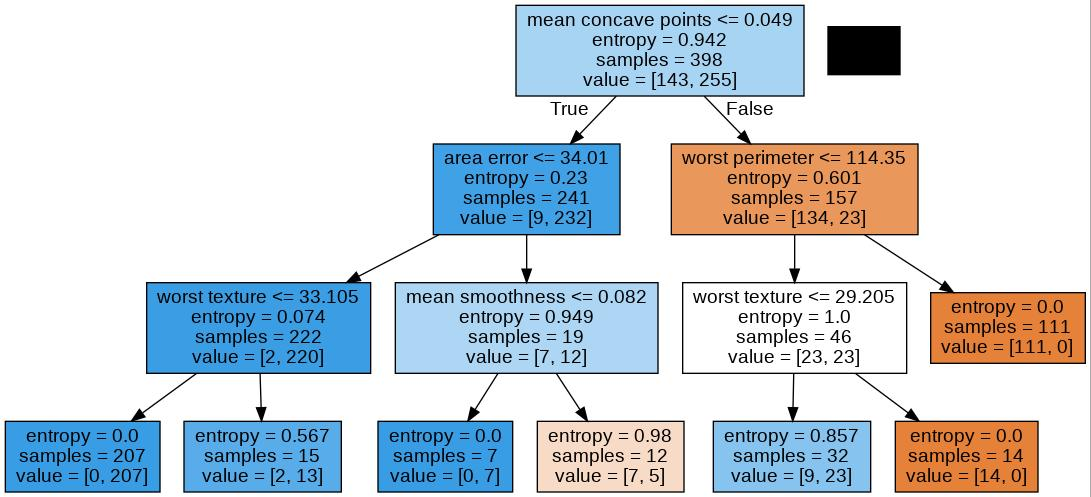

In [36]:
#exporting the tree model into odt file
gini = DecisionTreeClassifier(criterion = 'entropy' ,random_state=0, max_depth = 3).fit(X_train, y_train)
export_graphviz(gini, out_file='clf_tree_entropy.odt', feature_names = X_train.columns,filled = True)
graph = pdot.graphviz.graph_from_dot_file('clf_tree_entropy.odt')
graph.write_jpg('clf_tree_entropy.png')
Image(filename='clf_tree_entropy.png')

In [44]:
import math
entropy_imp_node1 = -((255/398)*math.log2(255/398) + (143/398)*math.log2(143/398))
print(round(entropy_imp_node1,3))

0.942
